In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
#read in cleaned episode data made in previous notebook
episodes = pd.read_csv("../data/episodes_cleaned.csv")
episodes.head()

### Instantiate the VADER Sentiment Analyzer and apply it to each episode and calculate and append the composite sentiment


In [ ]:
sia = SentimentIntensityAnalyzer()
def episode_sentiment(text):
    return sia.polarity_scores(text)["compound"]

episodes["composite_sentiment"] = episodes["text"].apply(episode_sentiment)

In [ ]:
# save to csv to reopen and investigate later
episodes.to_csv("../data/episodes_with_sentiment.csv", index=False)

##### Create a histogram to show the distribution of the composite sentiments
##### Overall episodes seem to have either a very positive score (close to 1) or very negative score (close to -1)

In [4]:
episodes = pd.read_csv("../data/episodes_with_sentiment.csv")

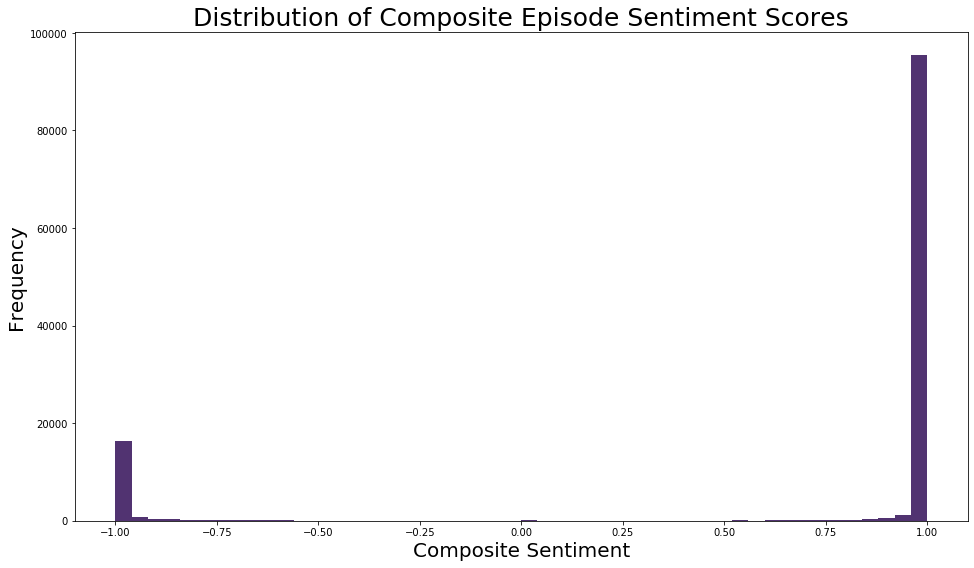

In [17]:
plt.figure(figsize=(16,9))
plt.title("Distribution of Composite Episode Sentiment Scores", fontsize=25)
plt.xlabel("Composite Sentiment", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.hist(episodes["composite_sentiment"], bins=50, color="#513371");

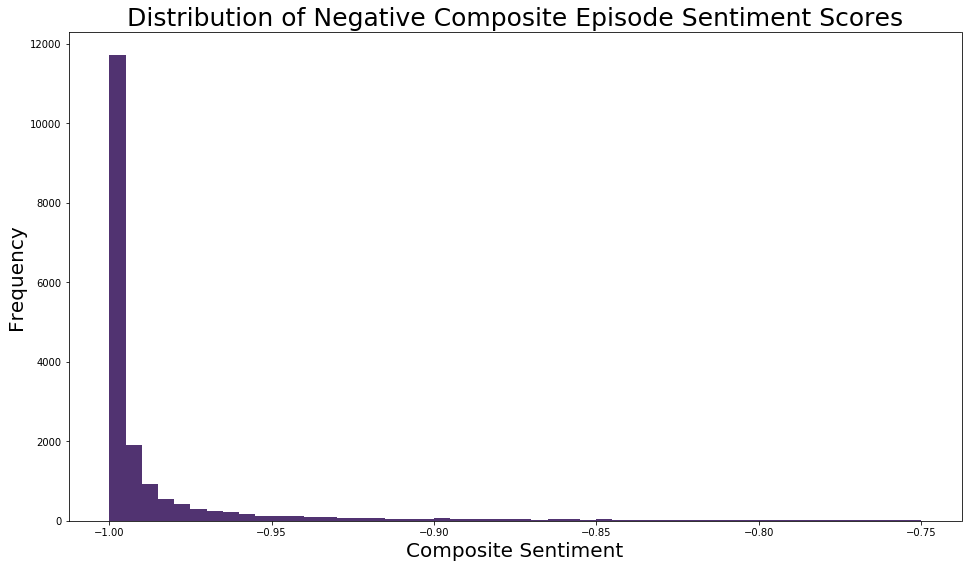

In [13]:
#negative sentiment episodes
plt.figure(figsize=(16,9))
plt.title("Distribution of Negative Composite Episode Sentiment Scores", fontsize=25)
plt.xlabel("Composite Sentiment", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
negative = episodes[episodes["composite_sentiment"] < -.75]["composite_sentiment"]
plt.hist(negative, bins=50, color="#513371");

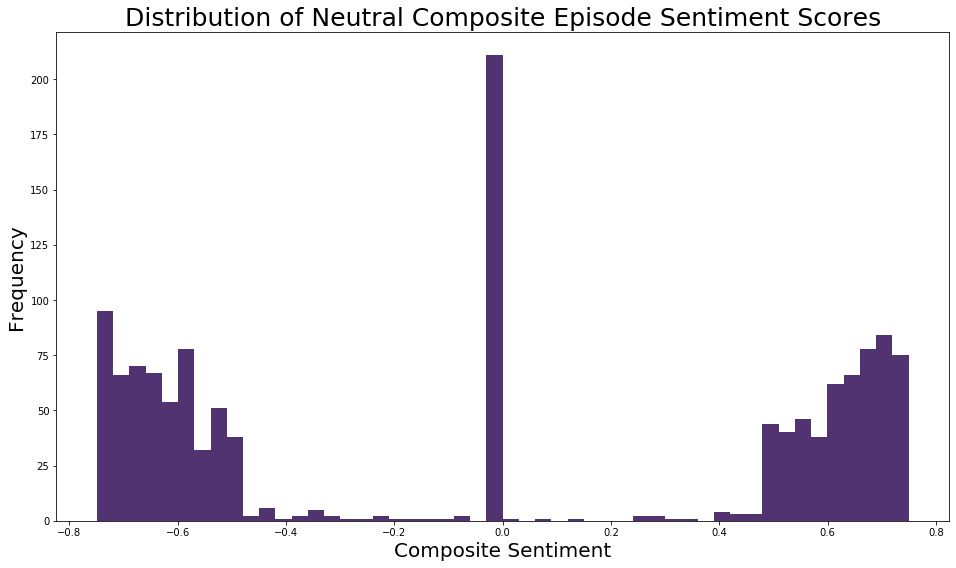

In [12]:
plt.figure(figsize=(16,9))
plt.title("Distribution of Neutral Composite Episode Sentiment Scores", fontsize=25)
plt.xlabel("Composite Sentiment", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
middle = episodes[(episodes["composite_sentiment"] > -.75)
                  & (episodes["composite_sentiment"] < .75)]["composite_sentiment"]
plt.hist(middle, bins=50, color="#513371");

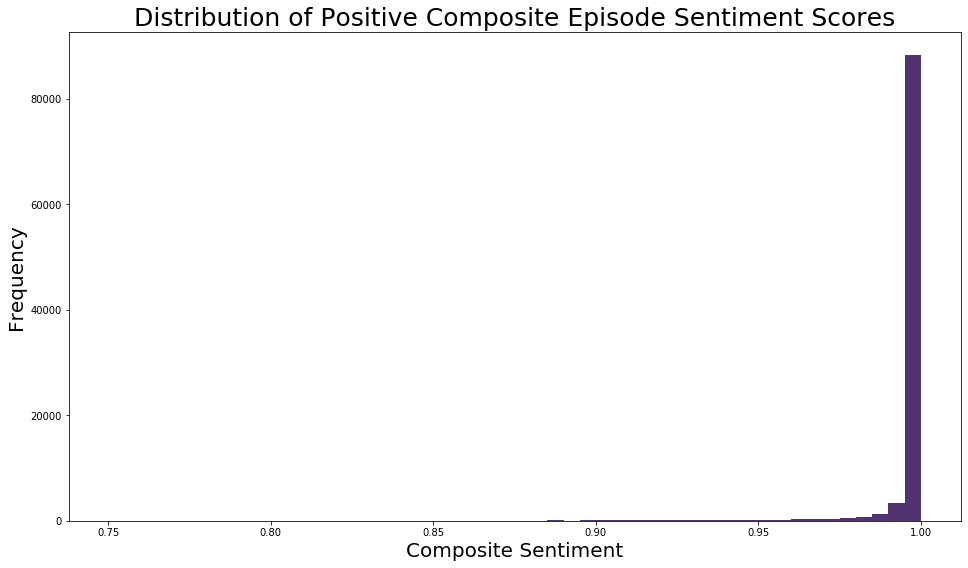

In [20]:
plt.figure(figsize=(16,9))
plt.title("Distribution of Positive Composite Episode Sentiment Scores", fontsize=25)
plt.xlabel("Composite Sentiment", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
positive = episodes[episodes["composite_sentiment"] > .75]["composite_sentiment"]
plt.hist(positive, bins=50, color="#513371");

### Looking at distributions of Composite Sentiment scores over the course of a TV series

In [26]:
#combining season and episode number into one column to order episodes
episodes["season_episode"] = 100 * (episodes["season_number"]) + episodes["episode_number"]

In [63]:
def show_sentiment_plot(show):
    plt.figure(figsize=(16, 9))
    plt.title(show + " Sentiment", fontsize=25)
    plt.xlabel("Season + Episode Number", fontsize=20)
    plt.ylabel("Composite Sentiment", fontsize=20)
    show_df = episodes[episodes["show_names"] == (show)]
    plt.plot(show_df["season_episode"], show_df["composite_sentiment"], color="#513371");

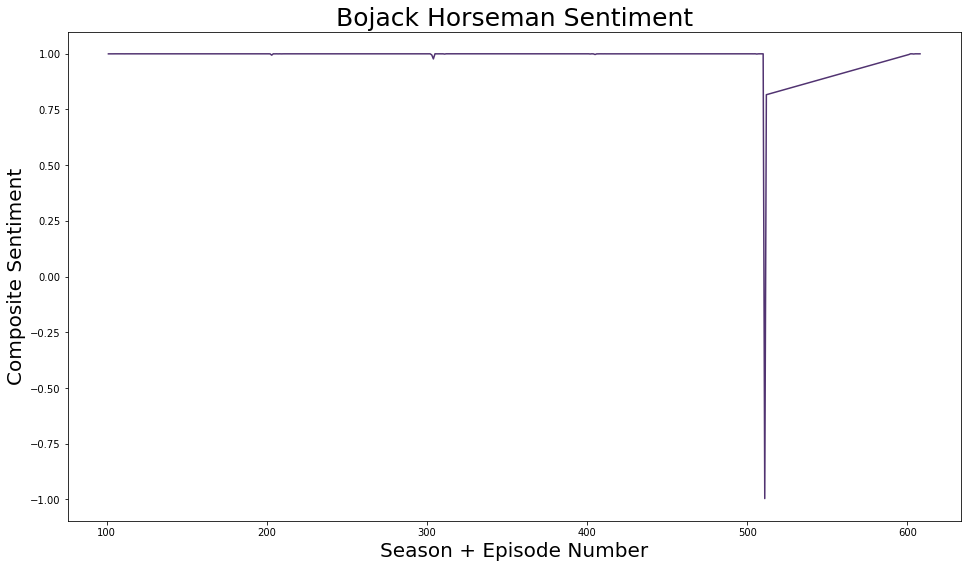

In [64]:
show_sentiment_plot("Bojack Horseman")

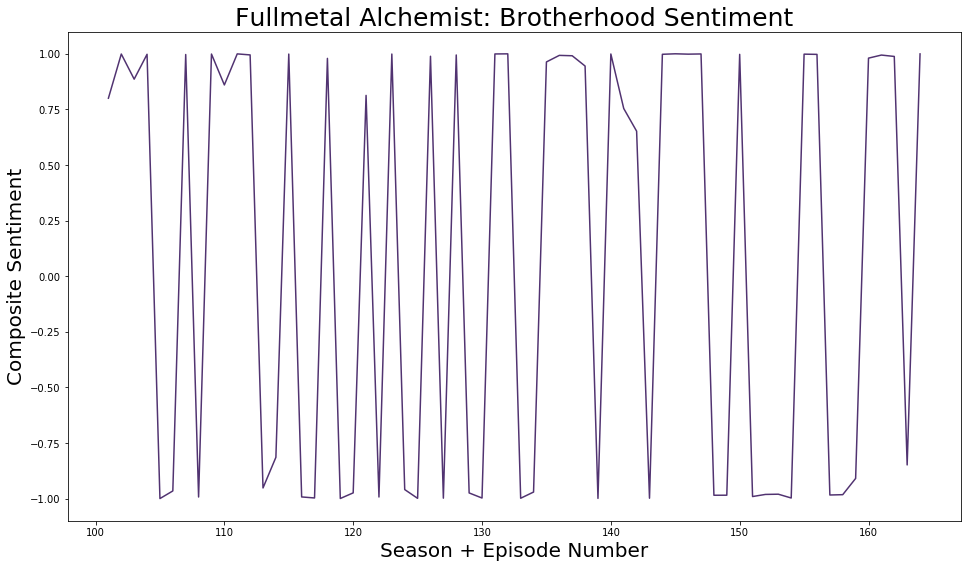

In [65]:
show_sentiment_plot("Fullmetal Alchemist: Brotherhood")

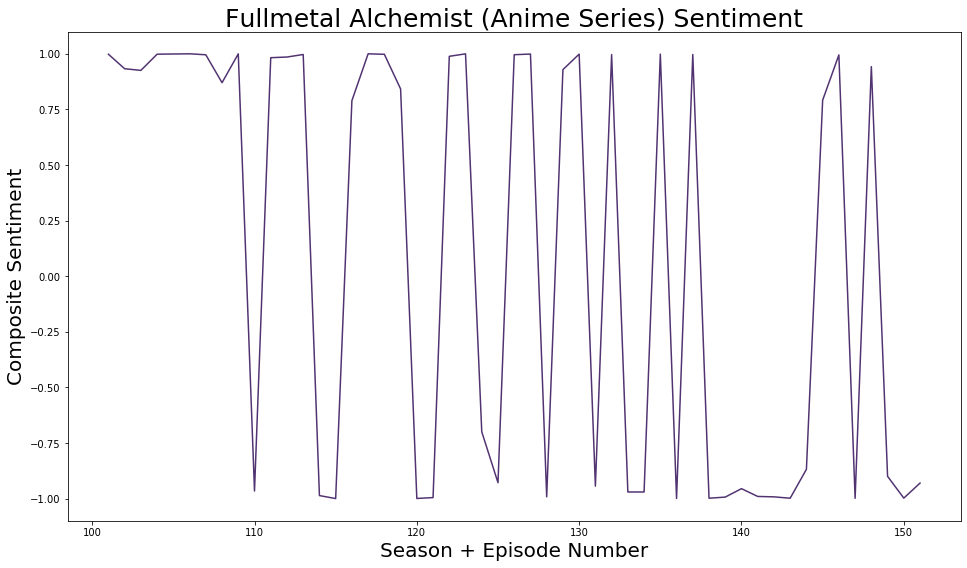

In [66]:
show_sentiment_plot("Fullmetal Alchemist (Anime Series)")

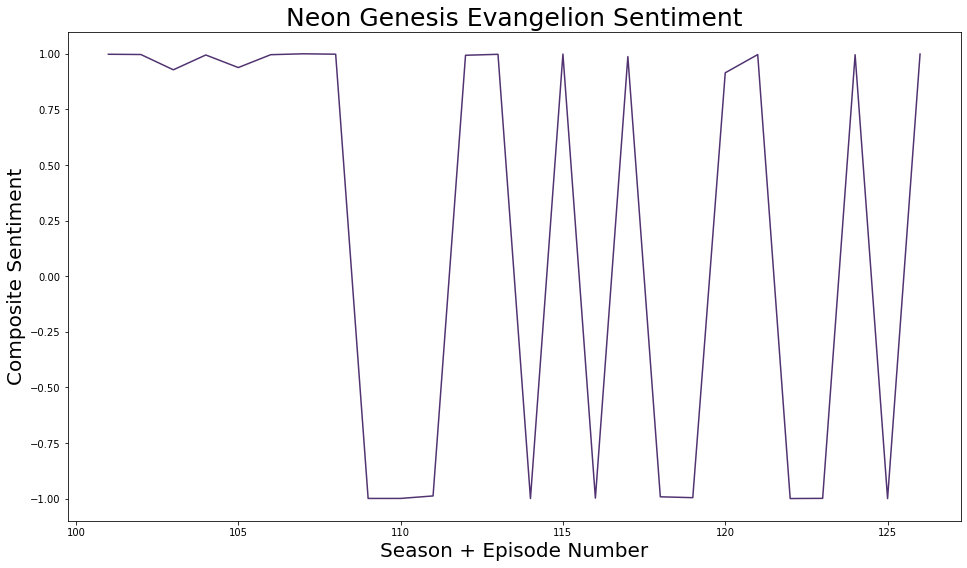

In [67]:
show_sentiment_plot("Neon Genesis Evangelion")

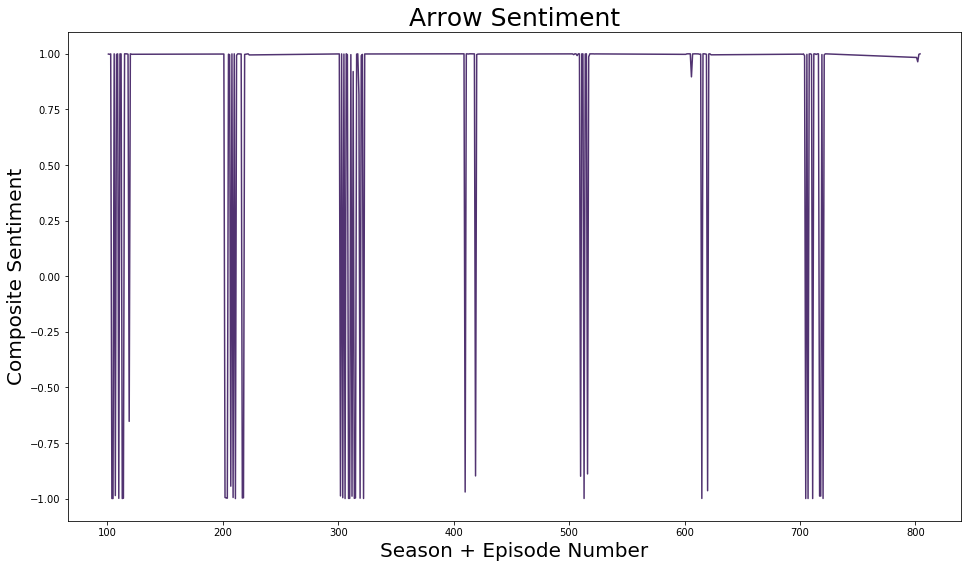

In [68]:
show_sentiment_plot("Arrow")

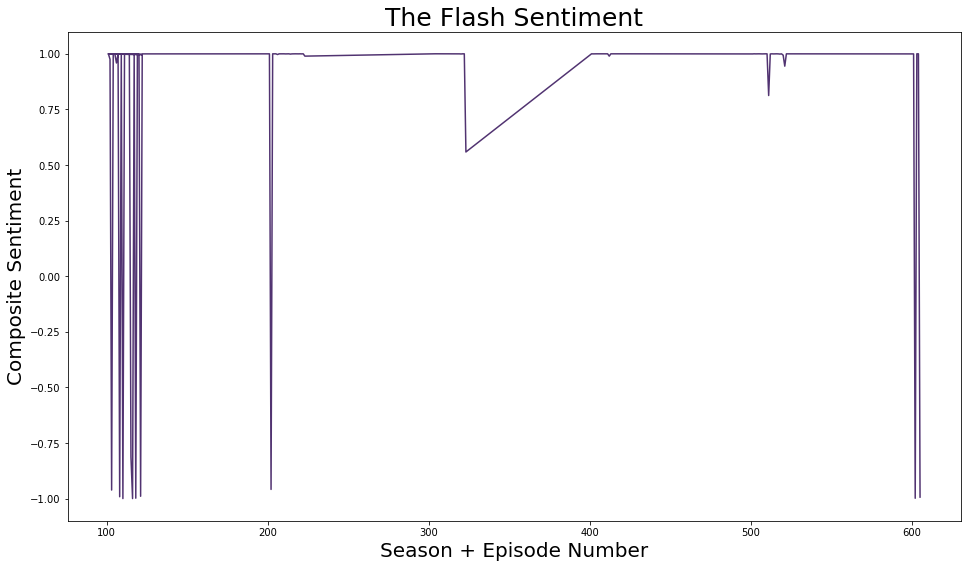

In [69]:
show_sentiment_plot("The Flash")

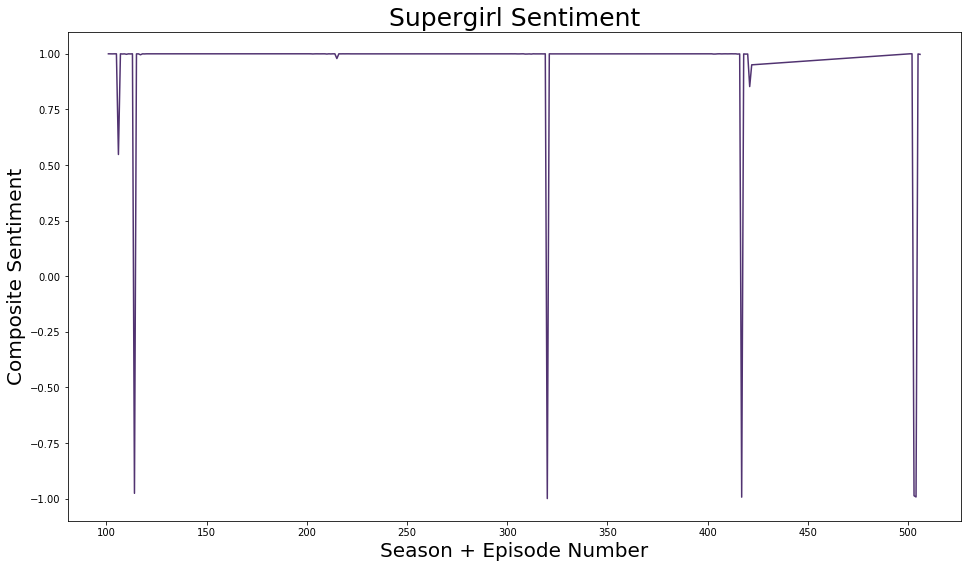

In [70]:
show_sentiment_plot("Supergirl")

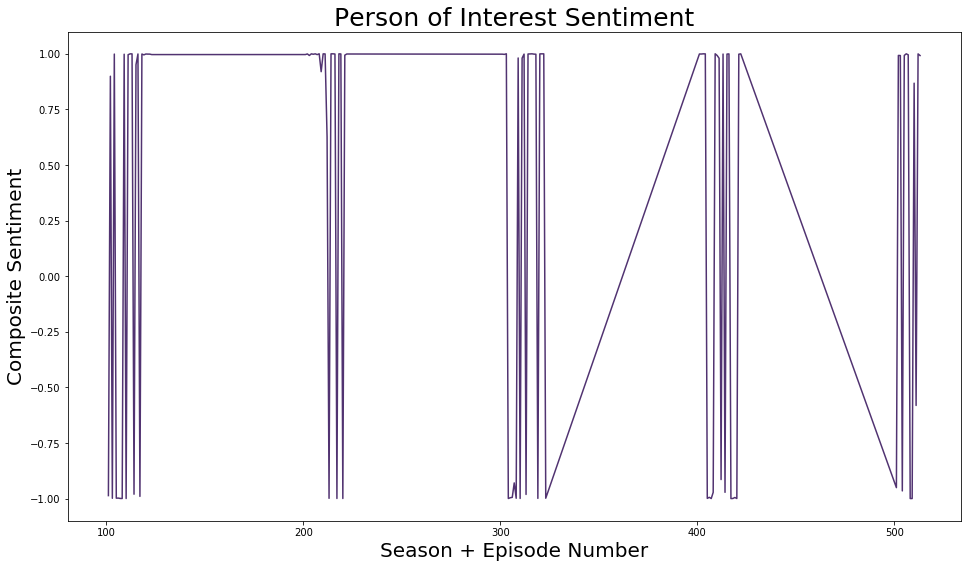

In [71]:
show_sentiment_plot("Person of Interest")

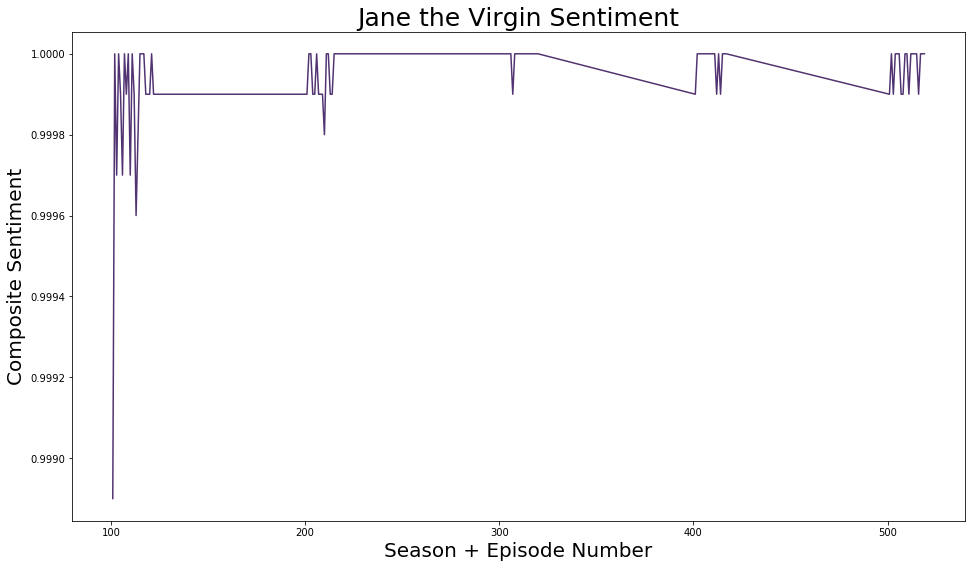

In [74]:
show_sentiment_plot("Jane the Virgin")

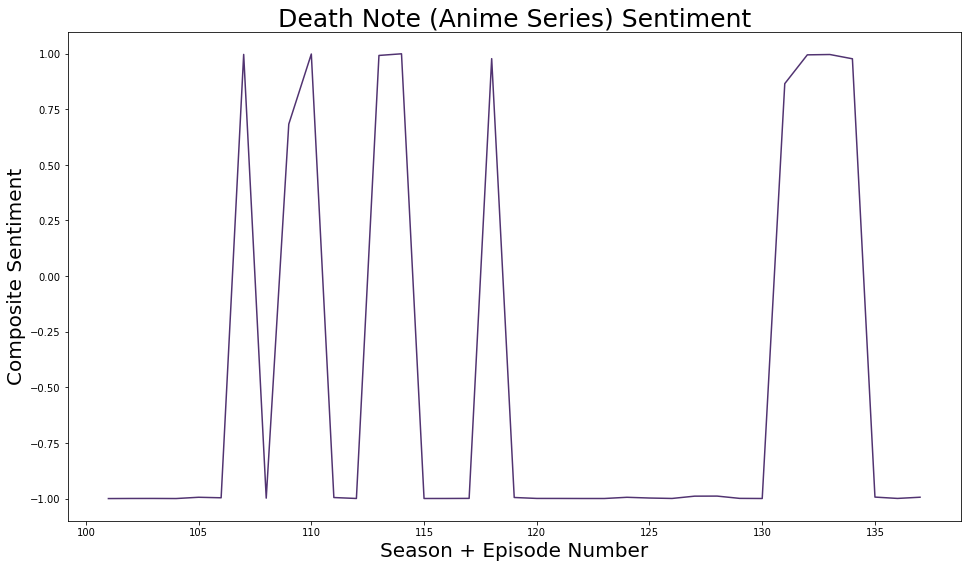

In [76]:
show_sentiment_plot("Death Note (Anime Series)")

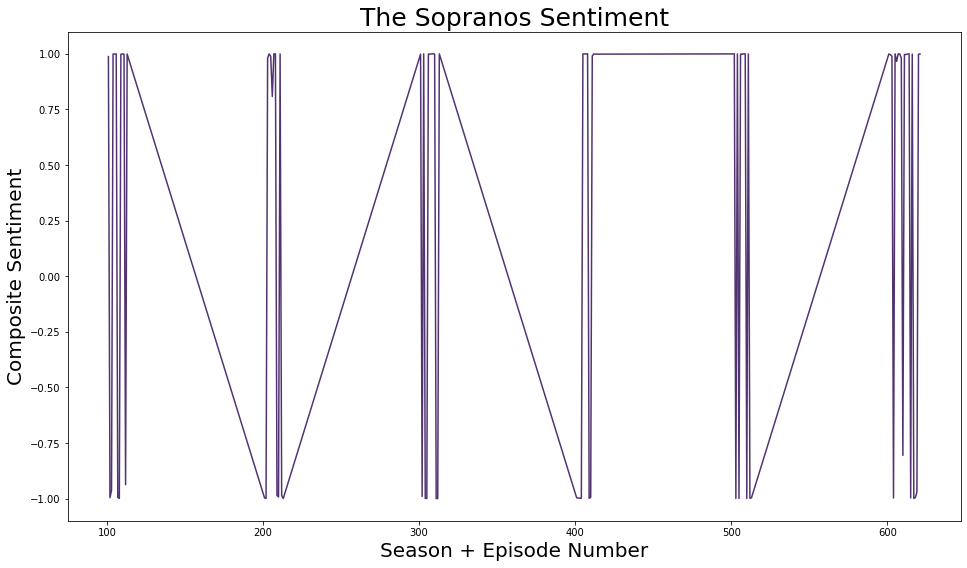

In [80]:
show_sentiment_plot("The Sopranos")

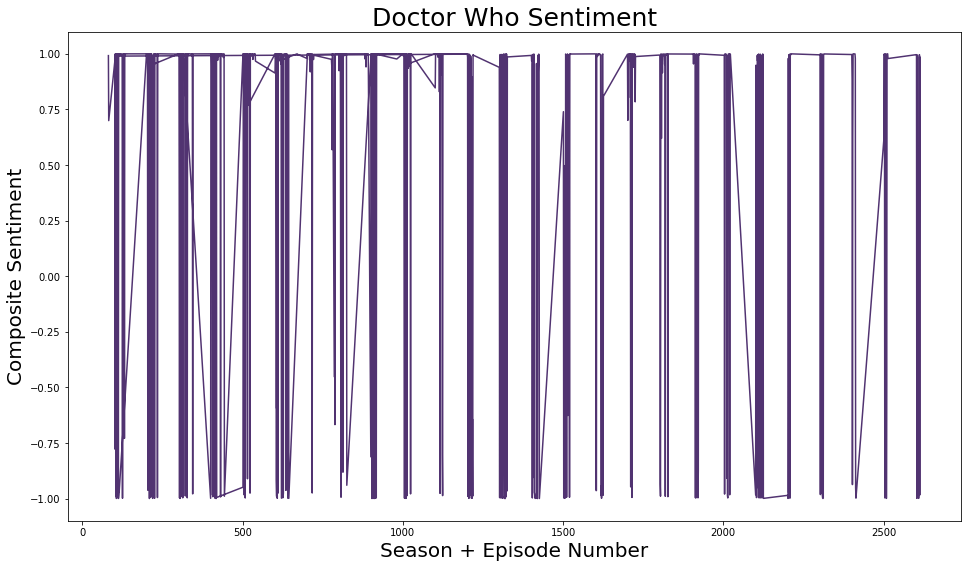

In [88]:
show_sentiment_plot("Doctor Who")